

<p style="text-align:center">
    <a href="https://nick9303.github.io/" target="_blank">
        <img src="https://nick9303.github.io/imgs/logo.png" width="200" alt="NBC">
    </a>
</p>


# Data Analytics: Customer and Cluster Analysis with Synthetic Data Base

This database was extracted from a Kaggle page [Consumer Behavior: Cluster Analysis | KMeans](https://www.kaggle.com/code/annastasy/consumer-behavior-cluster-analysis-kmeans/notebook#-3.-Loading-and-Understanding-Data-). From this page, codes will be used from the import of the required libraries up to data cleaning. However, some small corrections were added to improve the data analysis like incorporate age, which is an important factor to consider within the demographic analysis.

At the end, the database is also replaced with a augmented database to conduct a different cluster analysis and also to compare the model obtained from this scaled database with the original version done in the original Kaggle project.

For this project, I have conducted a data analysis in which I demonstrate different insights that help to understand how the business operates, how customers behave, and also how the campaigns and offers around the business perform. This way, I aim to add something additional to this project that has been done on Kaggle. I have also conducted an analysis of the niche, which would be the ideal customer that the company should focus on to increase its profits and to analyze patterns that could lead to more potential customers.



**Attributes**

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

The objective of this project is to:

* Identify the market niche in order to provide a data analysis that showcases customer behavior within the business

* Compare the cluster model with another cluster model, and verify its effectiveness.

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
palette = sns.color_palette("Spectral", n_colors=5)
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

# Loading and Understanding Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Proyectos personales/Customer Segmentation Marketing/marketing_campaign.csv", sep='\t')

In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(2240, 29)

#Data Cleaning and Feature Engineering


In [ ]:
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1


In [3]:
# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [4]:
# Converting data column into countable days
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161


In [5]:
# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')



In [6]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [7]:
# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

In [8]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

(2031, 31)

In [9]:
## Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_is_client,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000,2031.000
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-6.330,-1.984,-1.688,-0.905,-0.662,-0.740,-0.684,-0.655,-0.847,-1.208,-1.487,-0.910,-1.786,-2.182,-1.743,-0.999,-1.945
25%,-0.818,-0.660,-0.859,-0.837,-0.611,-0.670,-0.629,-0.631,-0.673,-0.691,-0.762,-0.910,-0.860,-0.952,-0.863,-0.893,-0.900
50%,0.101,-0.032,0.004,-0.384,-0.461,-0.441,-0.465,-0.462,-0.383,-0.174,-0.036,-0.229,-0.242,0.278,-0.003,-0.350,0.014
75%,0.686,0.634,0.867,0.594,0.168,0.273,0.228,0.165,0.235,0.344,0.689,0.451,0.684,0.688,0.867,0.729,0.797
max,2.273,24.058,1.730,3.520,4.340,6.864,4.042,5.658,5.355,6.550,8.307,8.619,2.228,6.018,1.713,3.176,3.801


In [10]:

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

In [ ]:
df.shape

(1788, 31)

In [11]:
# Calculate the age based on Year_Birth and the year 2025
df['Age'] = 2025 - df['Year_Birth']

# Data Analysis

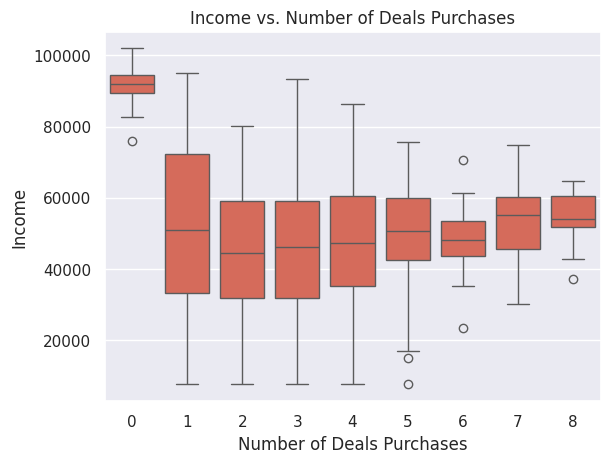

In [ ]:

# Assuming your DataFrame is named 'df'
sns.boxplot(x='NumDealsPurchases', y='Income', data=df) # Changed sns.scatter to sns.scatterplot
plt.title('Income vs. Number of Deals Purchases')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Income')
plt.show()

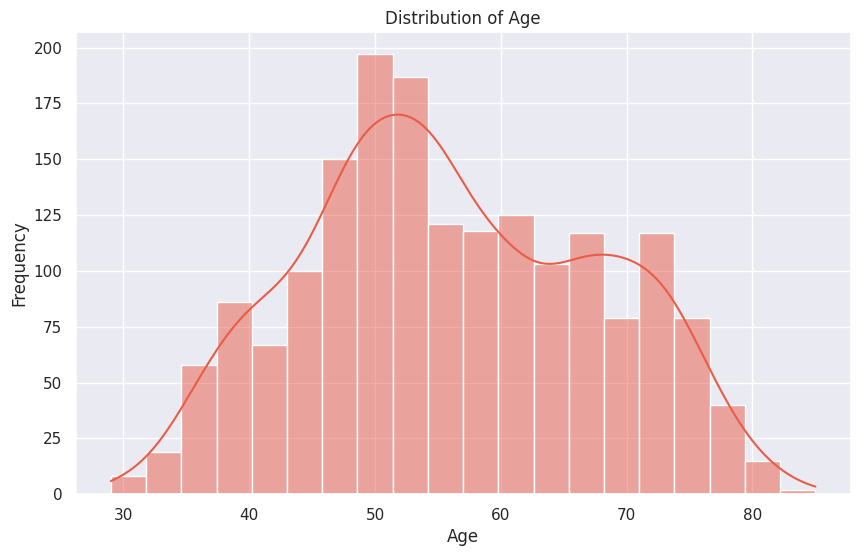

In [ ]:


# Assuming 'df' is your DataFrame and 'Age' is the column with age data

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

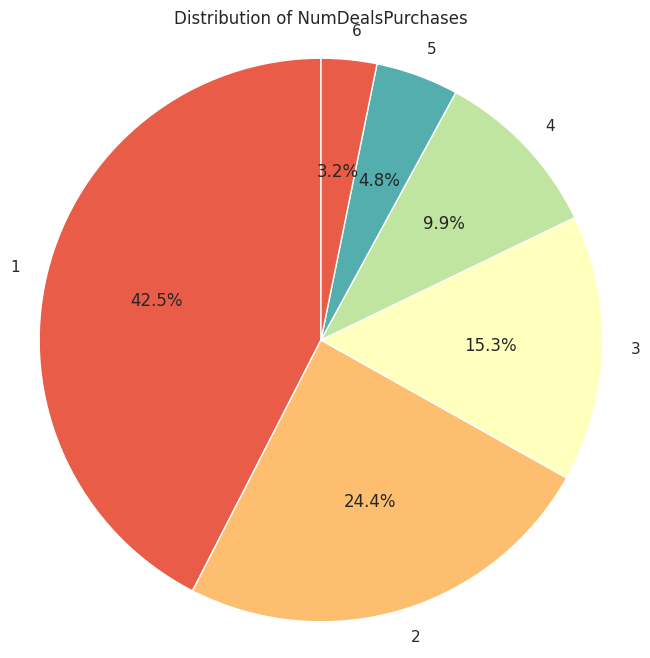

In [ ]:

# Assuming 'df' is your DataFrame and 'NumDealsPurchases' is the column
num_deals_purchases_filtered = df[(df['NumDealsPurchases'] > 0) & (df['NumDealsPurchases'] <= 6)]['NumDealsPurchases']

# Count the occurrences of each value
value_counts = num_deals_purchases_filtered.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of NumDealsPurchases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

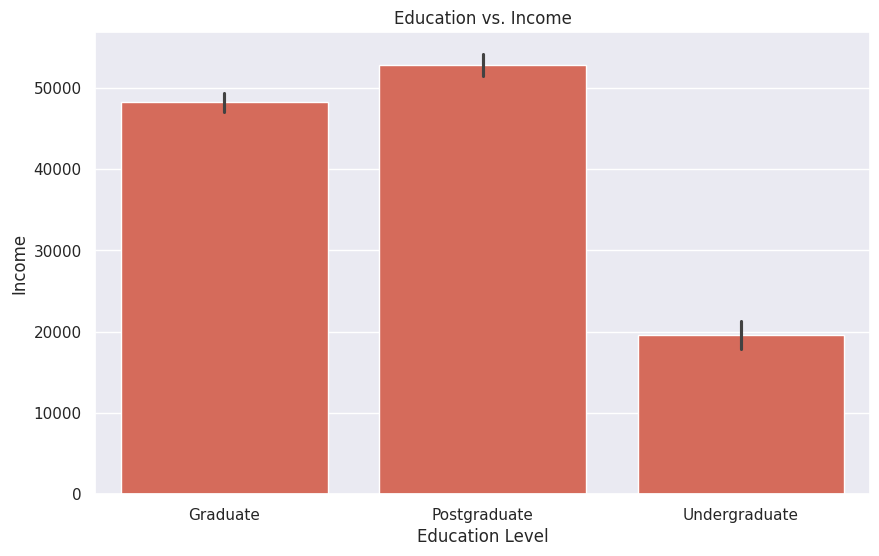

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=df)
plt.title('Education vs. Income')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

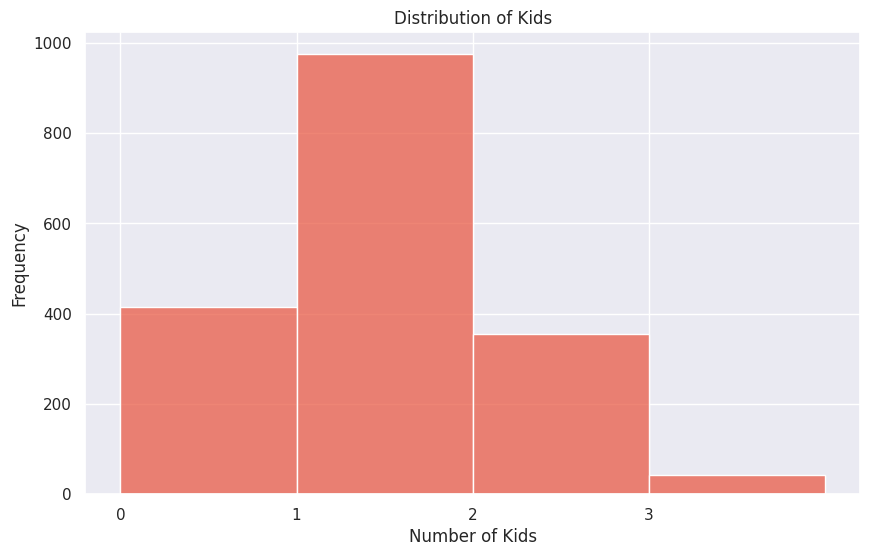

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(df['Kids'], kde=False, bins=range(int(df['Kids'].min()), int(df['Kids'].max()) + 2)) # Use range for integer bins
plt.title('Distribution of Kids')
plt.xlabel('Number of Kids')
plt.ylabel('Frequency')
plt.xticks(range(int(df['Kids'].min()), int(df['Kids'].max()) + 1)) # Ensure only whole numbers on x-axis
plt.show()

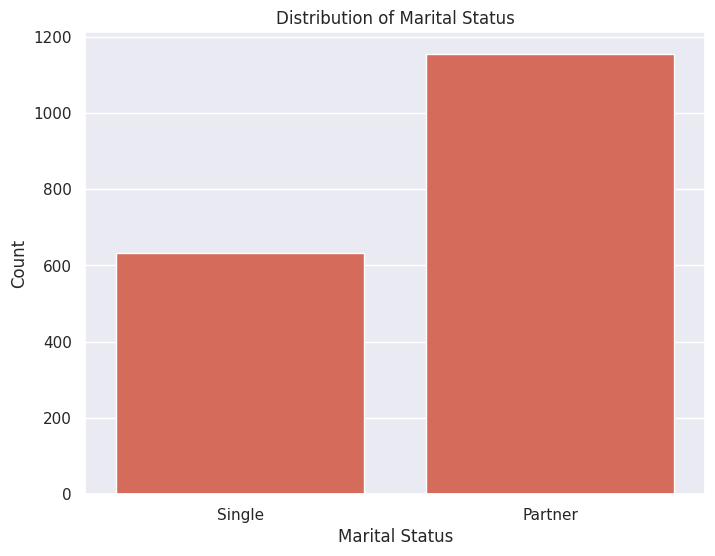

In [ ]:


# Assuming 'df' is your DataFrame and 'Marital_Status' is the column
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

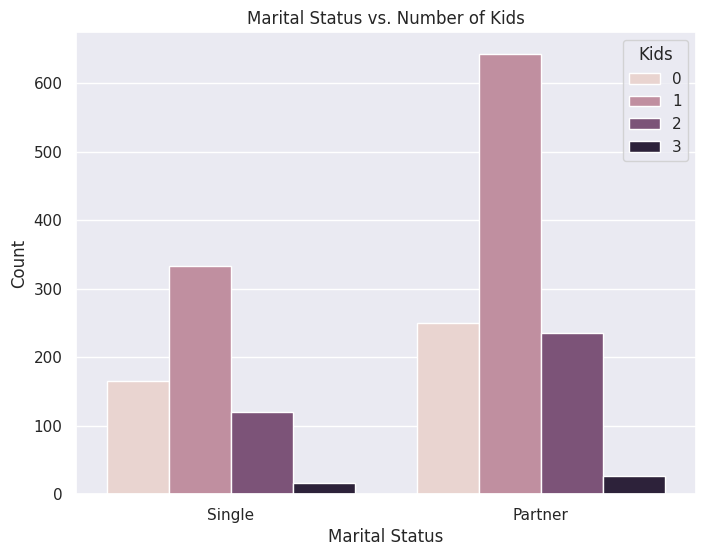

In [ ]:


plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', hue='Kids', data=df)
plt.title('Marital Status vs. Number of Kids')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

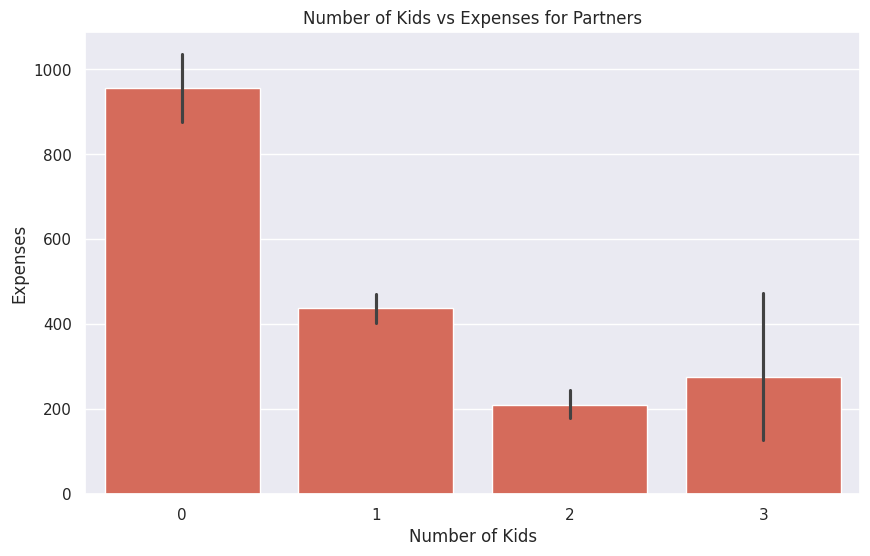

In [ ]:


partner_df = df[df['Marital_Status'] == 'Partner']

plt.figure(figsize=(10, 6))
sns.barplot(x='Kids', y='Expenses', data=partner_df)
plt.title('Number of Kids vs Expenses for Partners')
plt.xlabel('Number of Kids')
plt.ylabel('Expenses')
plt.show()

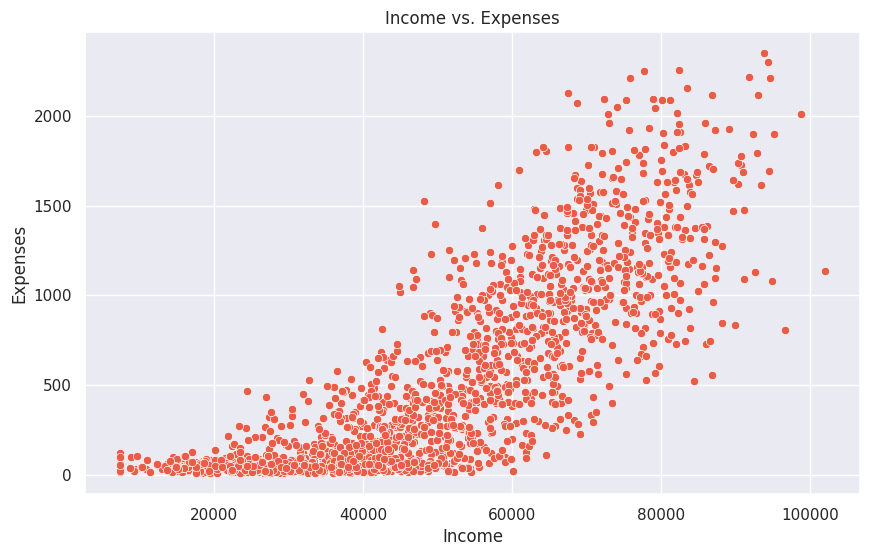

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Expenses', data=df)
plt.title('Income vs. Expenses')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

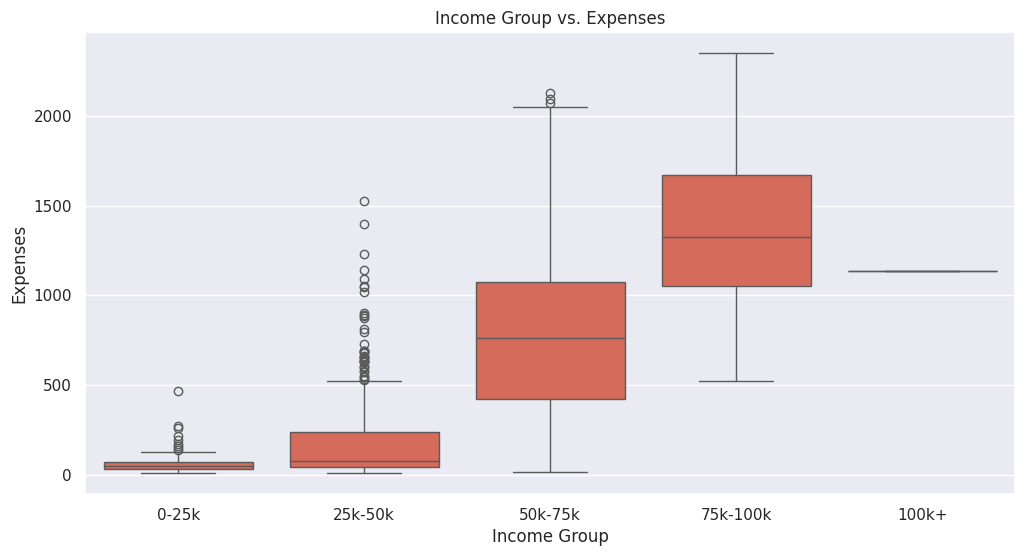

In [ ]:


# Define income bins
income_bins = [0, 25000, 50000, 75000, 100000, float('inf')]
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']

# Bin the income data
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Group', y='Expenses', data=df)
plt.title('Income Group vs. Expenses')
plt.xlabel('Income Group')
plt.ylabel('Expenses')
plt.show()

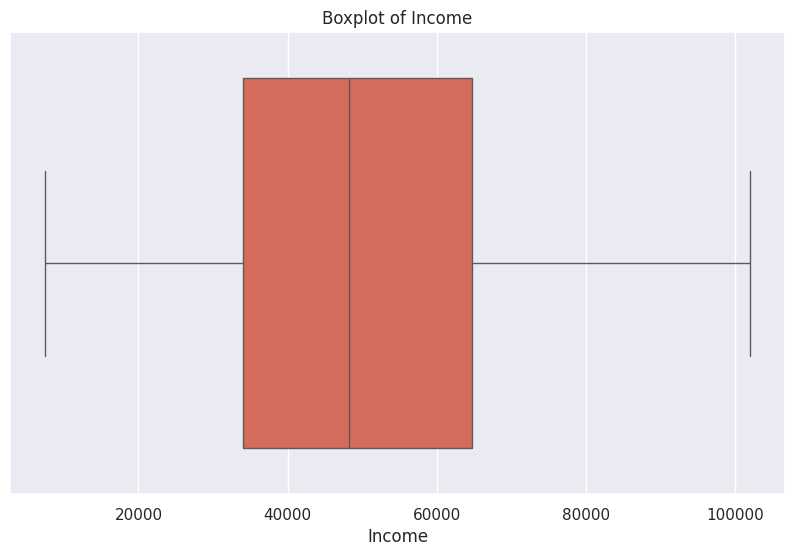

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', data=df)
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

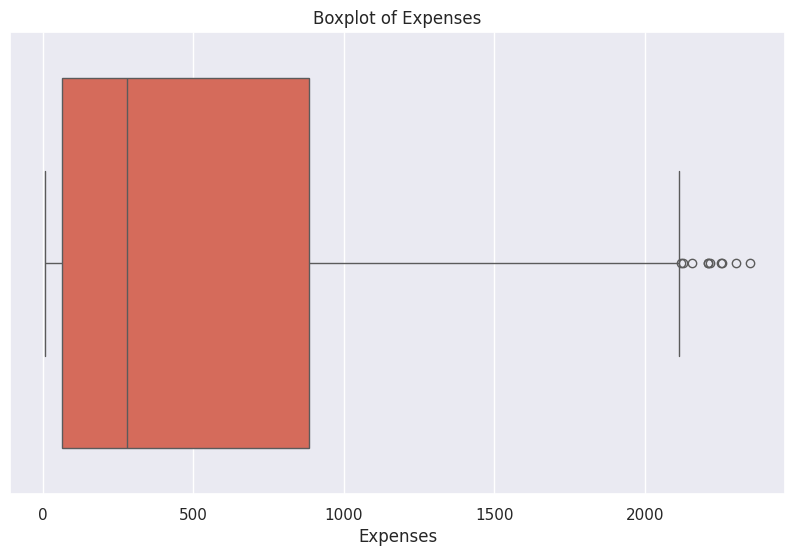

In [ ]:
# prompt: boxplot of expenses

plt.figure(figsize=(10, 6))
sns.boxplot(x='Expenses', data=df)
plt.title('Boxplot of Expenses')
plt.xlabel('Expenses')
plt.show()

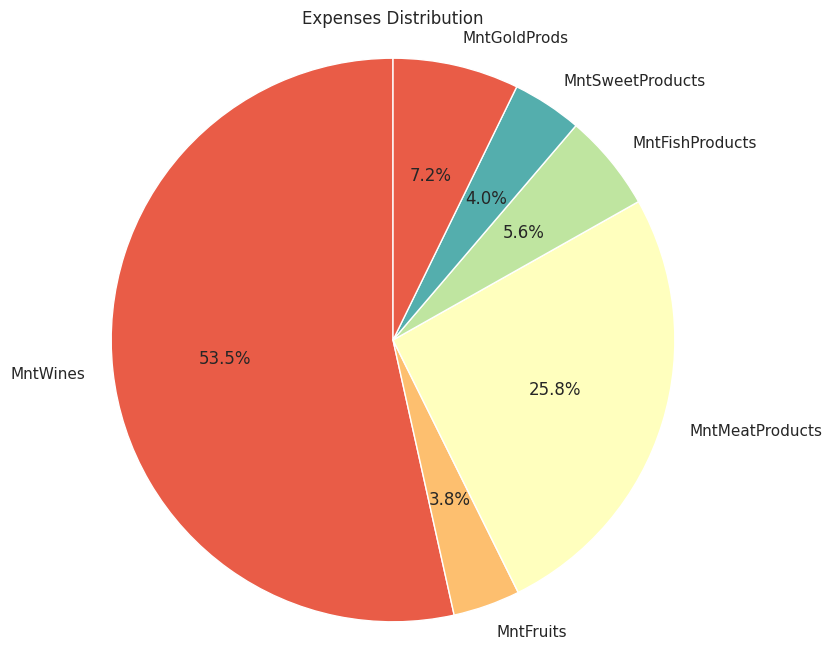

In [ ]:

# Assuming 'df' is your DataFrame and the columns exist
expenses_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
expenses_data = df[expenses_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(expenses_data, labels=expenses_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Expenses Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

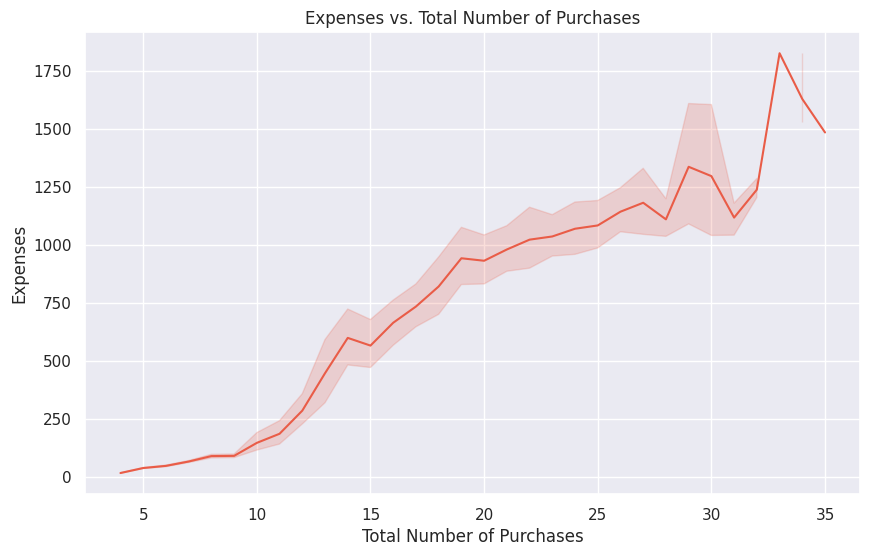

In [ ]:
# prompt: show me a line plot of expenses vs totalnumpurchases

plt.figure(figsize=(10, 6))
sns.lineplot(x='TotalNumPurchases', y='Expenses', data=df)
plt.title('Expenses vs. Total Number of Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Expenses')
plt.show()

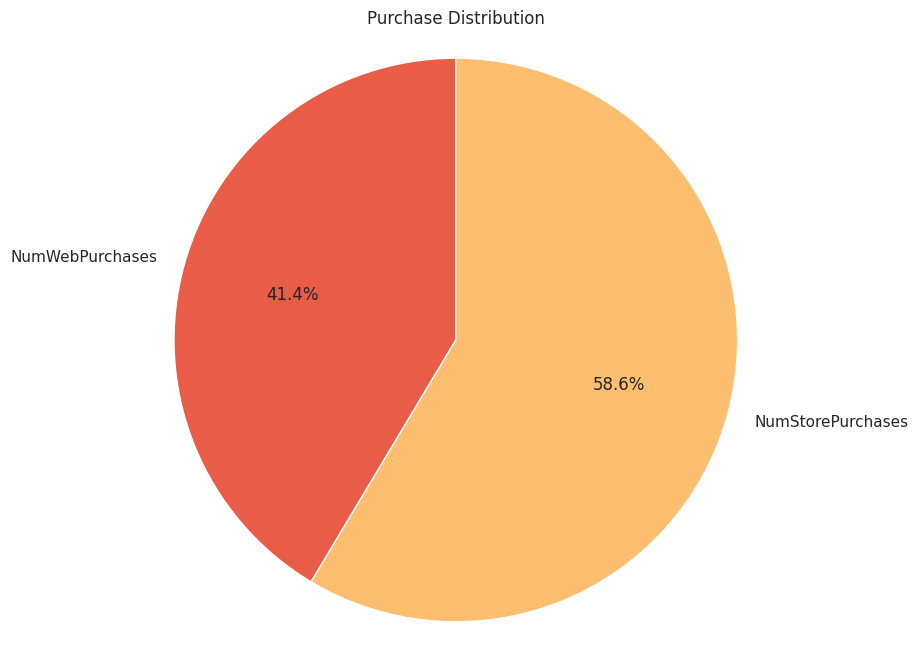

In [ ]:

# Assuming 'df' is your DataFrame
purchase_columns = ['NumWebPurchases', 'NumStorePurchases']
purchase_data = df[purchase_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(purchase_data, labels=purchase_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

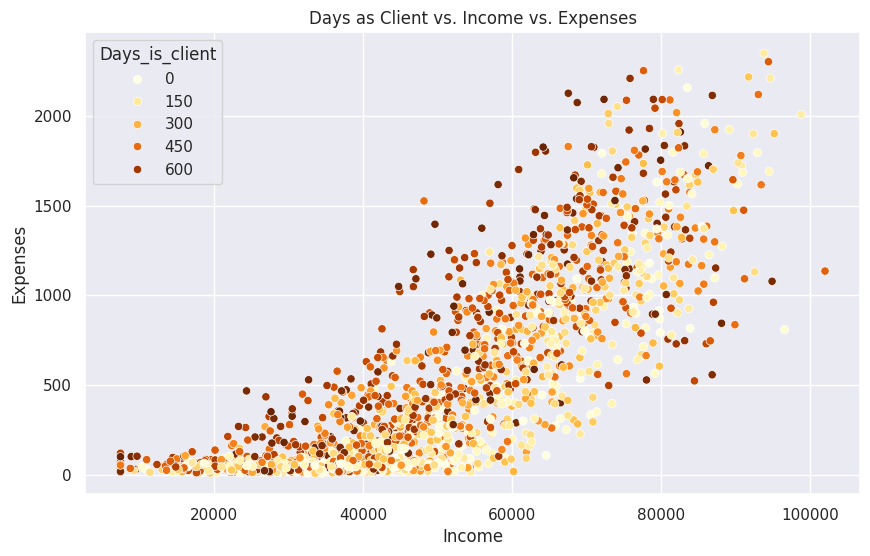

In [ ]:

# Assuming 'df' is your DataFrame and the columns exist
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Expenses', hue='Days_is_client', data=df, palette='YlOrBr')
plt.title('Days as Client vs. Income vs. Expenses')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

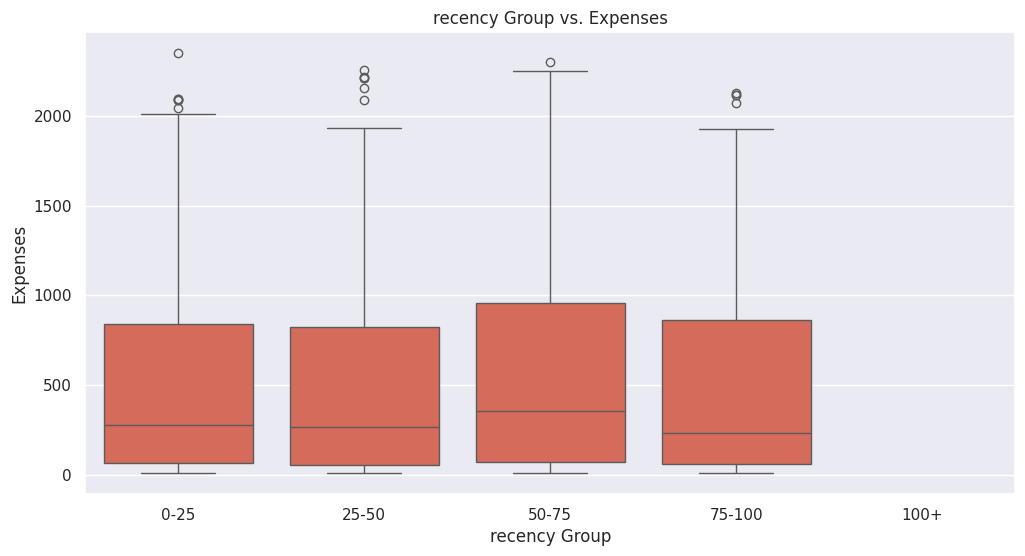

In [ ]:
# Define income bins
recency_bins = [0, 25, 50, 75, 100, float('inf')]
recency_labels = ['0-25', '25-50', '50-75', '75-100', '100+']

# Bin the income data
df['recency_Group'] = pd.cut(df['Recency'], bins=recency_bins, labels=recency_labels, right=False)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='recency_Group', y='Expenses', data=df)
plt.title('recency Group vs. Expenses')
plt.xlabel('recency Group')
plt.ylabel('Expenses')
plt.show()


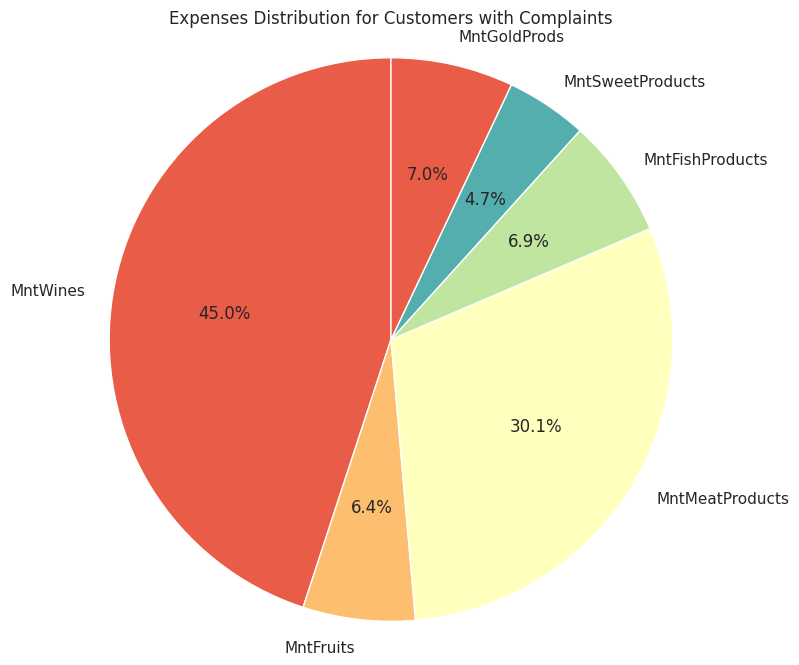

In [ ]:

# Calculate the sum of expenses for each category in the filtered DataFrame
expenses_data = complain_filtered_df[expenses_columns].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(expenses_data, labels=expenses_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Expenses Distribution for Customers with Complaints')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* People with high income usually don't take offers, and people who take two or more offers often have an income between 45,000 and 60,000 USD.

* Approximately 42.5% of the offers taken are only on a single offer, and these individuals have an income between 45,000 and 65,000 USD.

* The general age range is between 45 to 72 years old.

* People who earn more tend to have higher education, with a significant increase of 5,000 USD compared to those who only have a college degree earning up to 52,000 USD. However, those with no education have an income up to 30,000 USD less than others.

* Most people have only one child.

* Most are married or in a relationship.

* Those without any children spend the most in the store.

* According to the correlation between income and spending, it can be seen that higher income results in higher spending.

* Incomes range is between 35,000 to 65,000 USD.

* Spending ranges is between 100 to 900 USD.

* The largest spending category is wine, accounting for 53.5% of purchases, followed by meat at 25.8%.

* The main channel for most purchases is through the store, with 58.6% of purchases made there compared to those made on the web.

* Usually, the number of days that have passed since the customer made their last purchase ranges from 24 to 74 days.

# Niche - Understanding Potential Customers

In marketing, the best customer is the one that expend more and have a long fidelity to the brand, thats why to understand better their behavior is neccesary to gather just the customers that have a long time expending on the store.

To achieve this, the database has been filtered as follows:

* Filter those individuals who have spent at least 100 USD or more.
* Filter the individuals who have been customers for more than 1 year (365 days).
* Filter those customers whose last purchase was less than a month ago.


In [13]:
# Filter customer
hec = df[df['Expenses'] > 100]
dic = hec[hec['Days_is_client'] > 365]
niche = dic[dic['Recency'] < 30]
# Display the filtered data
niche.shape

(181, 32)

With this sample of 181 customers, the aim is to analyze their behavior to identify key patterns of customers who have demonstrated ideal activity within the business. Using this data, the goal is to help create new and improved offers that attract similarly ideal customers—those whose behavior benefits the business.

In [14]:
niche.describe().T

,count,mean,min,25%,50%,75%,max,std
Year_Birth,181.0,1967.447514,1944.0,1959.0,1968.0,1975.0,1996.0,11.555843
Income,181.0,55131.729282,7500.0,42720.0,55686.0,68657.0,89891.0,17368.639505
Kidhome,181.0,0.281768,0.0,0.0,0.0,1.0,2.0,0.46326
Teenhome,181.0,0.59116,0.0,0.0,1.0,1.0,2.0,0.525705
Dt_Customer,181,2013-01-11 09:24:51.712707072,2012-08-03 00:00:00,2012-10-18 00:00:00,2013-01-11 00:00:00,2013-03-30 00:00:00,2013-06-28 00:00:00,NaN
Recency,181.0,14.635359,0.0,7.0,14.0,23.0,29.0,9.079872
MntWines,181.0,418.265193,1.0,151.0,322.0,629.0,1285.0,339.309391
MntFruits,181.0,29.027624,0.0,4.0,17.0,38.0,142.0,34.270238
MntMeatProducts,181.0,191.0,3.0,50.0,109.0,269.0,842.0,190.604011
MntFishProducts,181.0,40.767956,0.0,6.0,23.0,64.0,193.0,45.909588


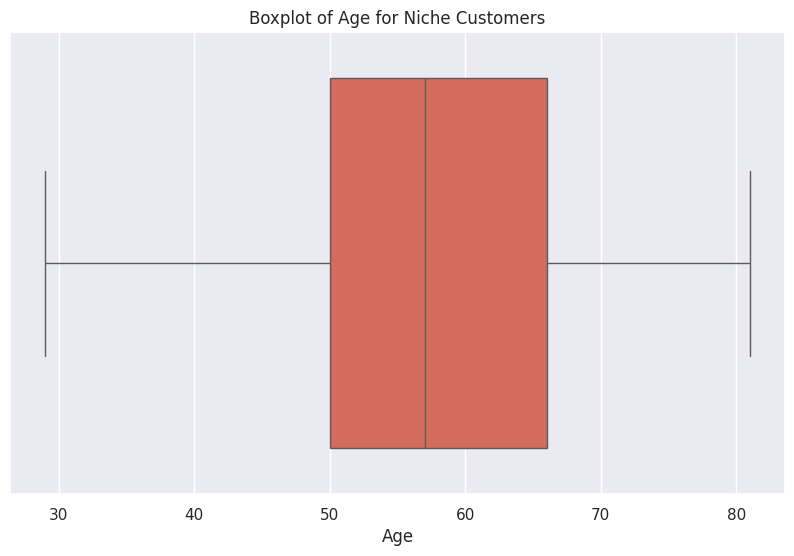

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=niche)  # Use the 'niche' DataFrame
plt.title('Boxplot of Age for Niche Customers')
plt.xlabel('Age')
plt.show()

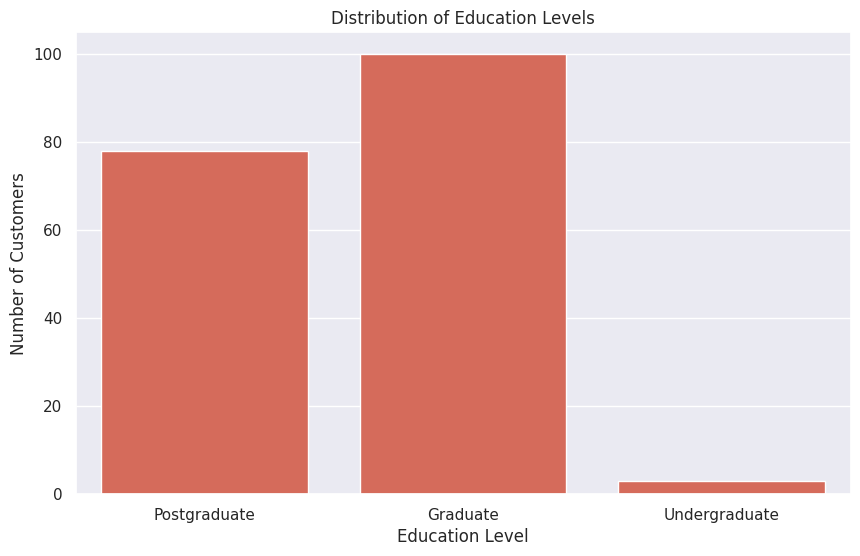

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=niche)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

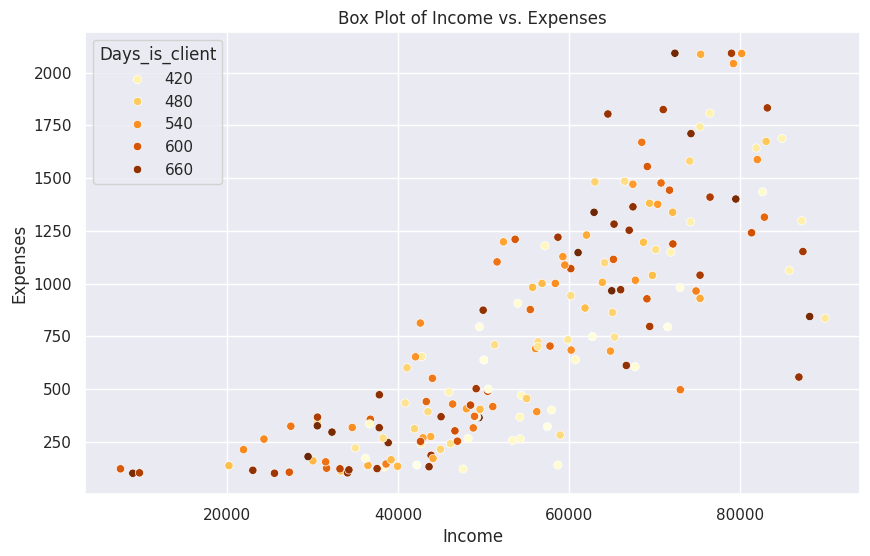

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Expenses',hue='Days_is_client', data=niche, palette='YlOrBr')
plt.title('Box Plot of Income vs. Expenses')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

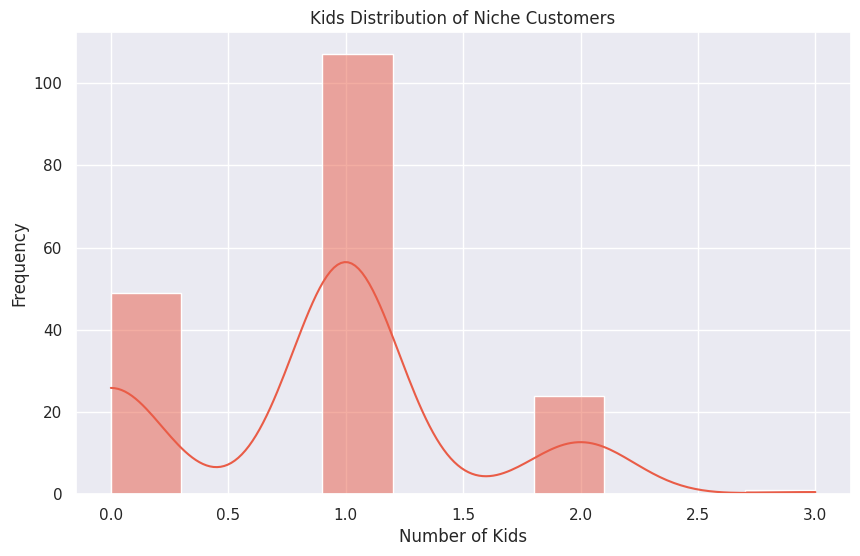

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(niche['Kids'], kde=True, bins=10) # Use the 'Kids' column for the histogram
plt.title('Kids Distribution of Niche Customers')
plt.xlabel('Number of Kids')
plt.ylabel('Frequency')
plt.show()

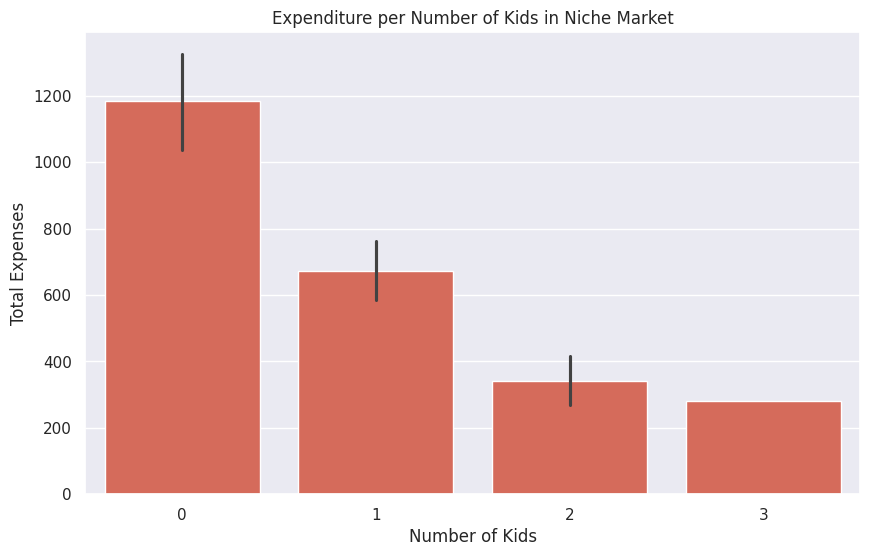

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Kids', y='Expenses', data=niche)
plt.title('Expenditure per Number of Kids in Niche Market')
plt.xlabel('Number of Kids')
plt.ylabel('Total Expenses')
plt.show()

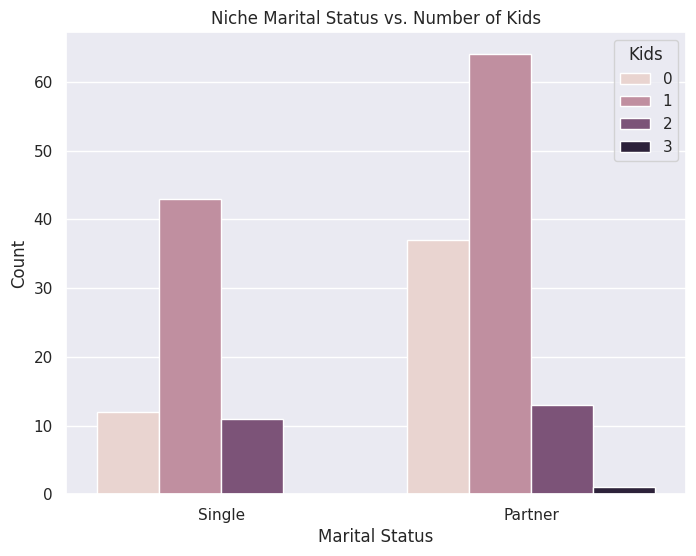

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', hue='Kids', data=niche)
plt.title('Niche Marital Status vs. Number of Kids')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

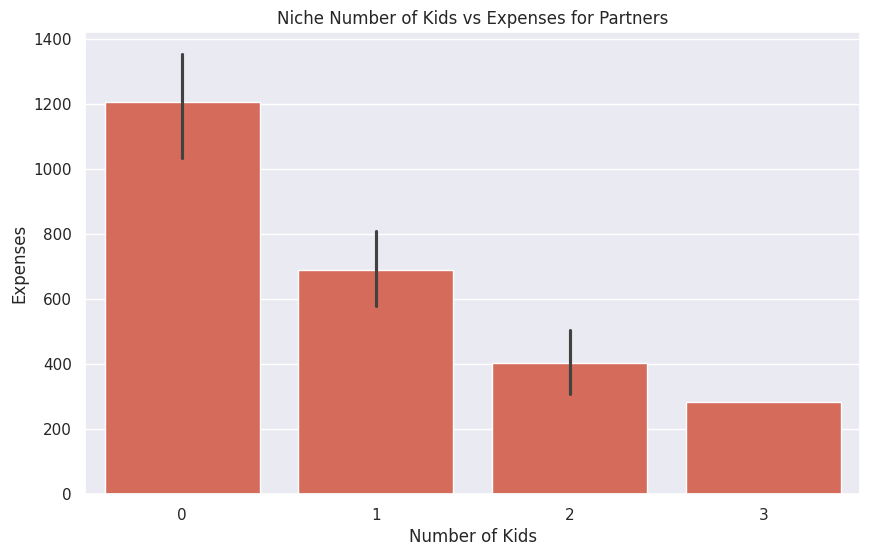

In [ ]:
partner_niche = niche[niche['Marital_Status'] == 'Partner']

plt.figure(figsize=(10, 6))
sns.barplot(x='Kids', y='Expenses', data=partner_niche)
plt.title('Niche Number of Kids vs Expenses for Partners')
plt.xlabel('Number of Kids')
plt.ylabel('Expenses')
plt.show()

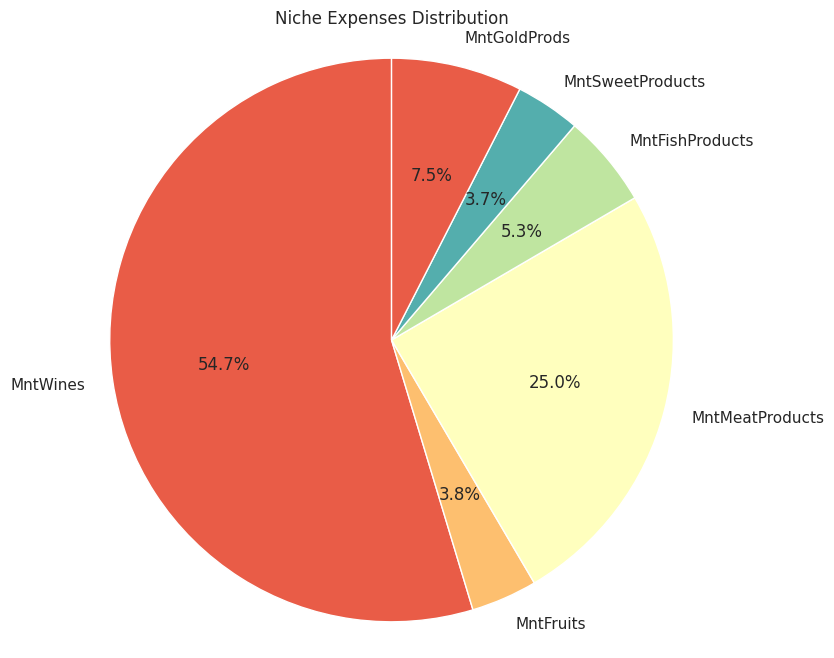

In [ ]:
expenses_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
expenses_niche = niche[expenses_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(expenses_niche, labels=expenses_niche.index, autopct='%1.1f%%', startangle=90)
plt.title('Niche Expenses Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

What do parents of only one child spend the most on?

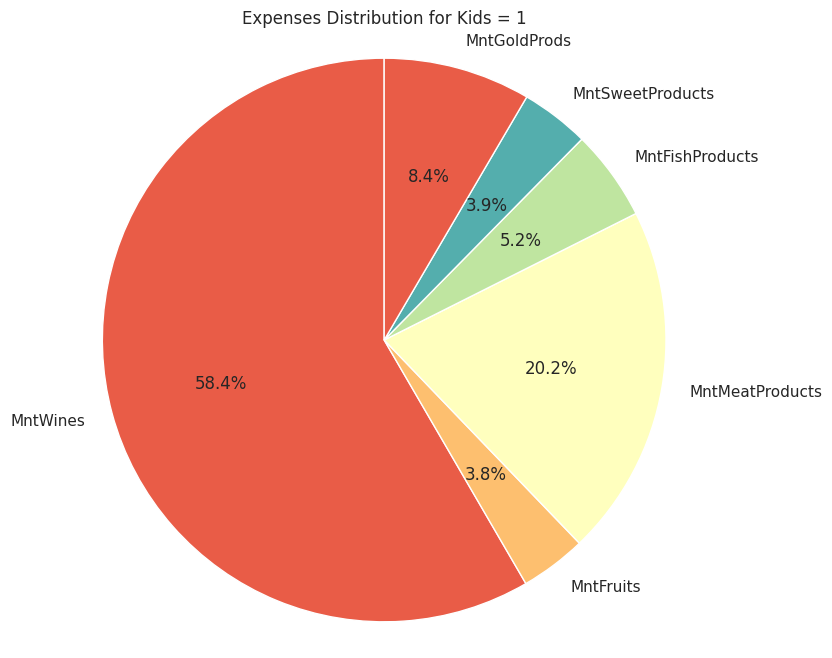

In [15]:
# Filter data where Kids == 1
kids_one_df = df[df['Kids'] == 1]

expenses_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Calculate the sum of expenses for each category in the filtered DataFrame
expenses_data = kids_one_df[expenses_columns].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(expenses_data, labels=expenses_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Expenses Distribution for Kids = 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

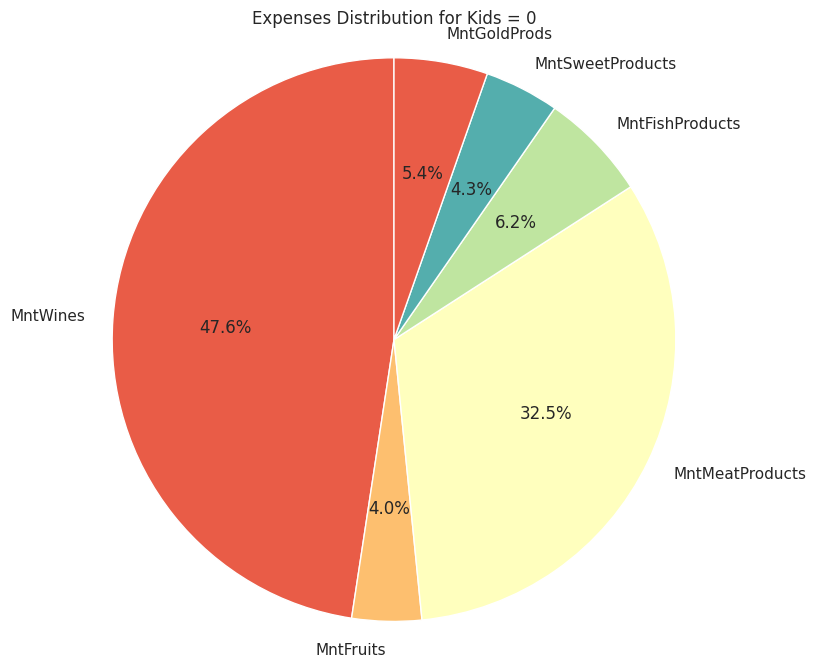

In [17]:
# Filter data where Kids == 0
kids_zero_df = df[df['Kids'] == 0]

expenses_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Calculate the sum of expenses for each category in the filtered DataFrame
expenses_data = kids_zero_df[expenses_columns].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(expenses_data, labels=expenses_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Expenses Distribution for Kids = 0')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

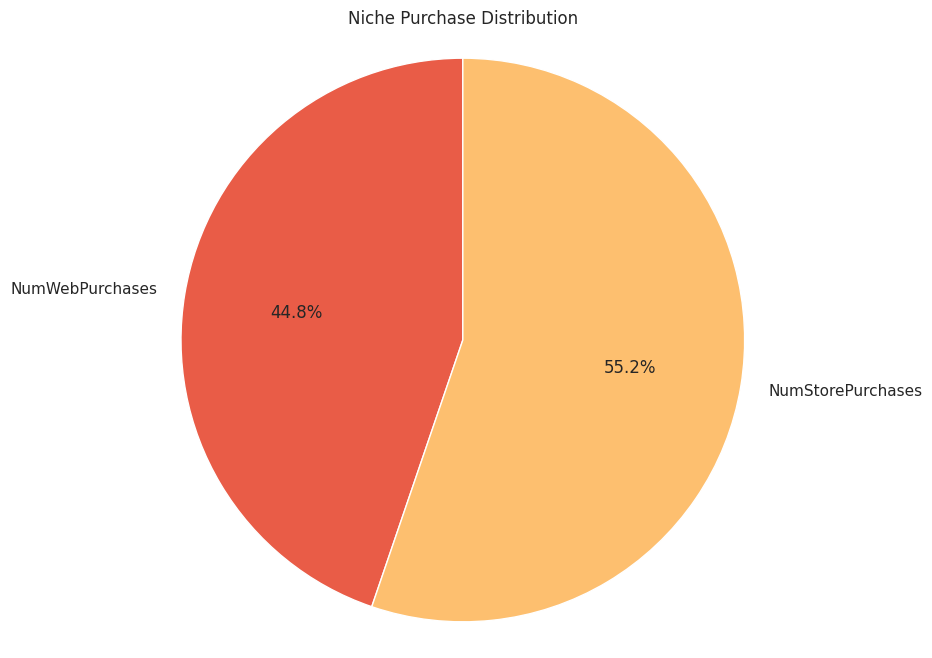

In [ ]:
purchase_columns = ['NumWebPurchases', 'NumStorePurchases']
purchase_niche = niche[purchase_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(purchase_niche, labels=purchase_niche.index, autopct='%1.1f%%', startangle=90)
plt.title('Niche Purchase Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* They have an income between 42,720 and 68,657 USD
* Spend between 300 and 1,161 USD in the business
* Purchase between 14 and 23 products
* They are between 50 and 66 years old
* nearly 100 have a university education, a little over 75 have higher education, and almost no one lacks formal education.

* Over 100 customers have one child, nearly 50 customers have no children, and just over 20 have two children.

* Customers with no childrens expend more than the others

* When comparing the number of children with relationship status, it is evident that among those in a relationship, there is a high number of couples without children.

* Focusing only on those in a relationship, it is clear that couples without children spend the most in the store, spending up to 1,200 USD, which is almost double what couples with only one child spend.

* Regarding spending, 54.7% is on wine, followed by 25% on meat.

* Clients with only one child spend 58.4% of their total store expenditure on wine, on the other hand, those without children spend 47.6% on wine and 32.5% on meat.

* 55.2% of purchases are made in-store, while only 44.8% are made online.

In conclusion, the ideal customer is a person between 50 and 66 years old, without children, with a university education, and an income between 42,000 and 68,000 USD. The product in which they invest the most is wine and the second is meat, highlighting their interest in the liquors offered and their preference for purchasing these products in-store.

# Campaign Performance


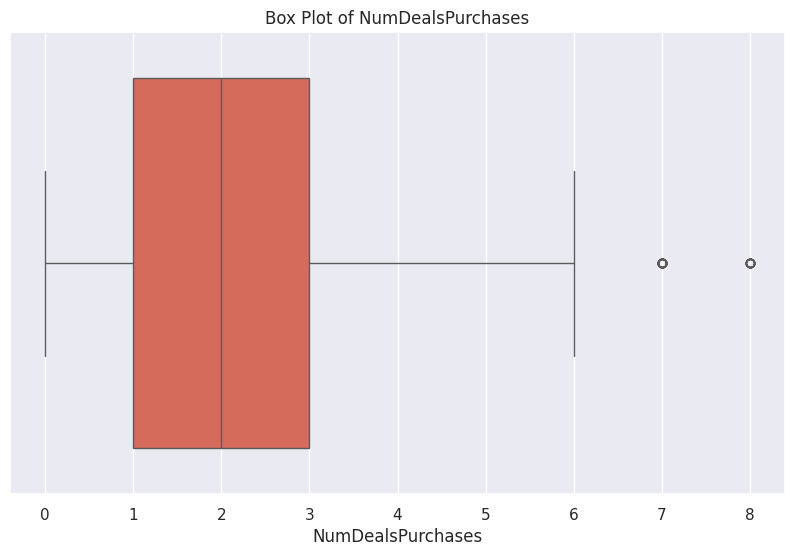

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NumDealsPurchases'])
plt.title('Box Plot of NumDealsPurchases')
plt.show()

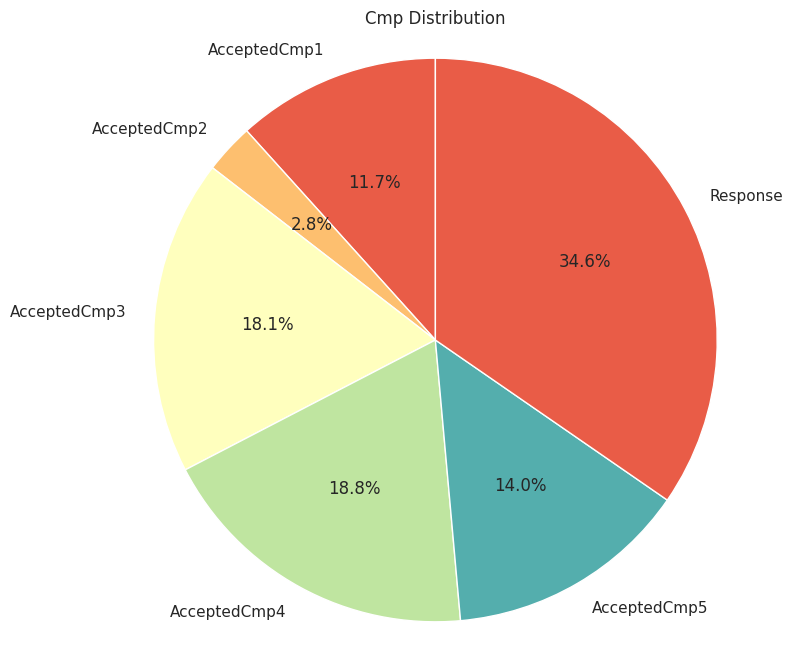

In [ ]:
 cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
cmp_data = df[cmp_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(cmp_data, labels=cmp_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Cmp Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

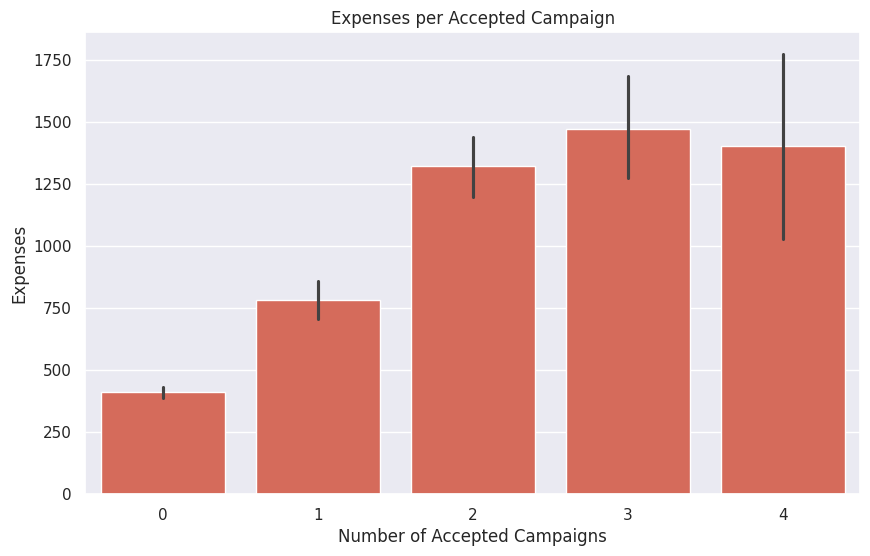

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalAcceptedCmp', y='Expenses', data=df)
plt.title('Expenses per Accepted Campaign')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Expenses')
plt.show()

In [ ]:
print(df['NumWebPurchases'].sum()/df['NumWebVisitsMonth'].sum()*100-)

71.4518096787312


* The customers accepted between 1 to 3 offers.

* The campaign with the worst performance was the second one, with a 2.8% success rate, while the best-performing campaign was the last one, with a 34.6% success rate. The other campaigns had a success rate above 10%.

* Customers who participated in 2 to 4 campaigns had a total expenditure of over $1,250.

* 71.4% of the website visits resulted in a sale, demonstrating high performance for the online store.

Although most sales are made in the physical store, online store is quite profitable and serves as an excellent channel to increase sales.

# Cluster Model

For this part of the cluster modeling, I have created a synthetic dataset using [Mostly](https://mostly.ai/) , where I processed the current database to transform it into an "enhanced" version. In this way, I aim to compare these results with the model from the original project to verify the effectiveness of this tool, which promises to improve outcomes.

In [ ]:
df_aug = pd.read_excel("/content/drive/MyDrive/Proyectos personales/Customer Segmentation Marketing/marketing_campaign_aug.xlsx")

In [ ]:
df_aug.head()

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Age
0,Postgraduate,Single,64544.0,0,370,76,47,9,0,0,0,76
1,Graduate,Single,40523.0,1,668,46,430,16,0,0,0,38
2,Graduate,Partner,42547.0,1,511,70,110,6,0,0,0,59
3,Graduate,Partner,45761.0,2,165,21,81,10,0,0,0,61
4,Graduate,Single,40662.0,1,424,32,32,6,0,0,1,75


In [ ]:
# Remove duplicate rows from the DataFrame
df_aug.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df_aug.dropna(inplace=True)

df_aug.shape

(2218, 12)

In [ ]:
## Detecting Outliers

binary_columns = [col for col in df_aug.columns if df_aug[col].nunique() == 2]
categorical_columns = [col for col in df_aug.columns if 2 < df_aug[col].nunique() < 10]
numerical_columns = [col for col in df_aug.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df_aug[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Income,Days_is_client,Recency,Expenses,TotalNumPurchases,Age
count,2218.000,2218.000,2218.000,2218.000,2218.000,2218.000
mean,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.172,-1.767,-1.638,-1.049,-1.866,-2.304
25%,-0.742,-0.877,-0.893,-0.923,-0.840,-0.731
50%,0.007,0.048,-0.014,-0.339,0.058,-0.120
75%,0.731,0.873,0.900,0.790,0.828,0.841
max,4.521,1.652,1.712,2.668,2.368,2.239


In [ ]:
# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df_aug = df_aug.drop(outliers.index)

In [ ]:
df_aug.shape

(2202, 12)

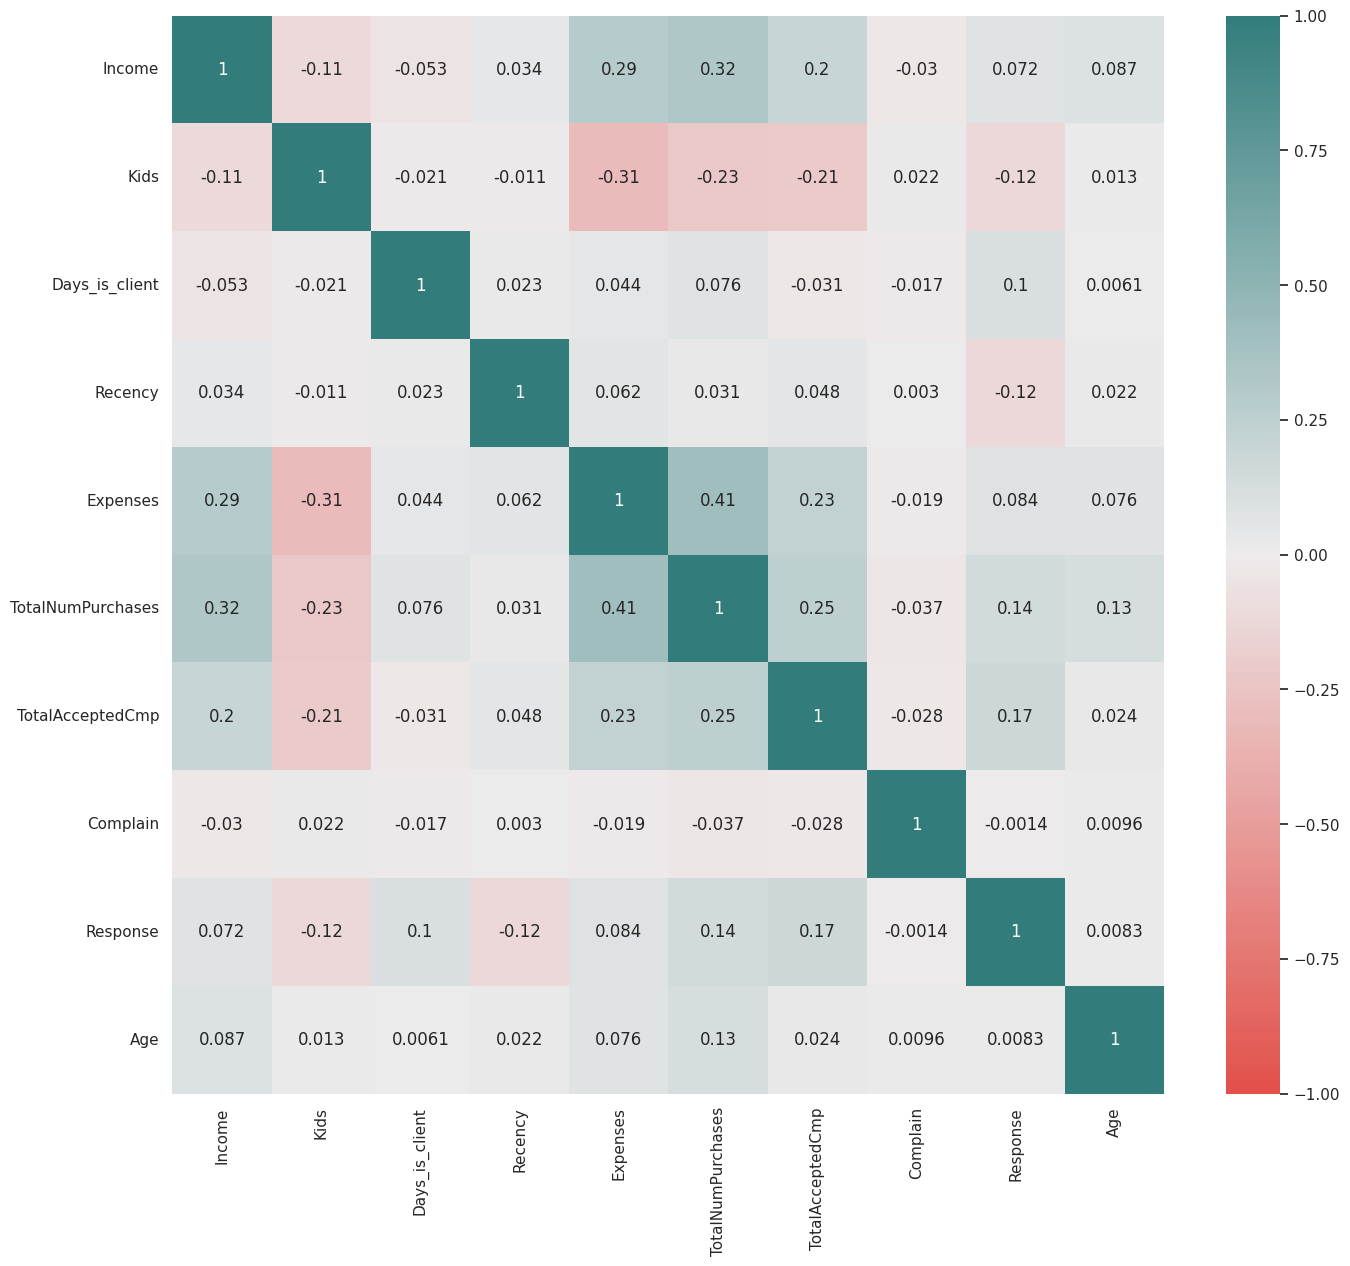

In [ ]:
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df_aug.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

In [ ]:
# Define categorical columns to be one-hot encoded
categorical_columns = df_aug.select_dtypes(include=['object']).columns

# Apply one-hot encoding directly with pandas
X_encoded = pd.get_dummies(df_aug, columns=categorical_columns, drop_first=True, dtype=int)

In [ ]:
# Instantiate Scaler
scaler = StandardScaler()

# fit_transfor m
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(2202, 13)

In [ ]:
# Initialize the KMeans algorithm with 2 clusters and a maximum of 50 iterations
kmeans = KMeans(n_clusters=2, max_iter=50)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [ ]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

,Income,Kids,Days_is_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Age,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,64544.0,0.0,370.0,76.0,47.0,9.0,0.0,0.0,0.0,76.0,1.0,0.0,1.0
1,40523.0,1.0,668.0,46.0,430.0,16.0,0.0,0.0,0.0,38.0,0.0,0.0,1.0
2,42547.0,1.0,511.0,70.0,110.0,6.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0
3,45761.0,2.0,165.0,21.0,81.0,10.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0
4,40662.0,1.0,424.0,32.0,32.0,6.0,0.0,0.0,1.0,75.0,0.0,0.0,1.0


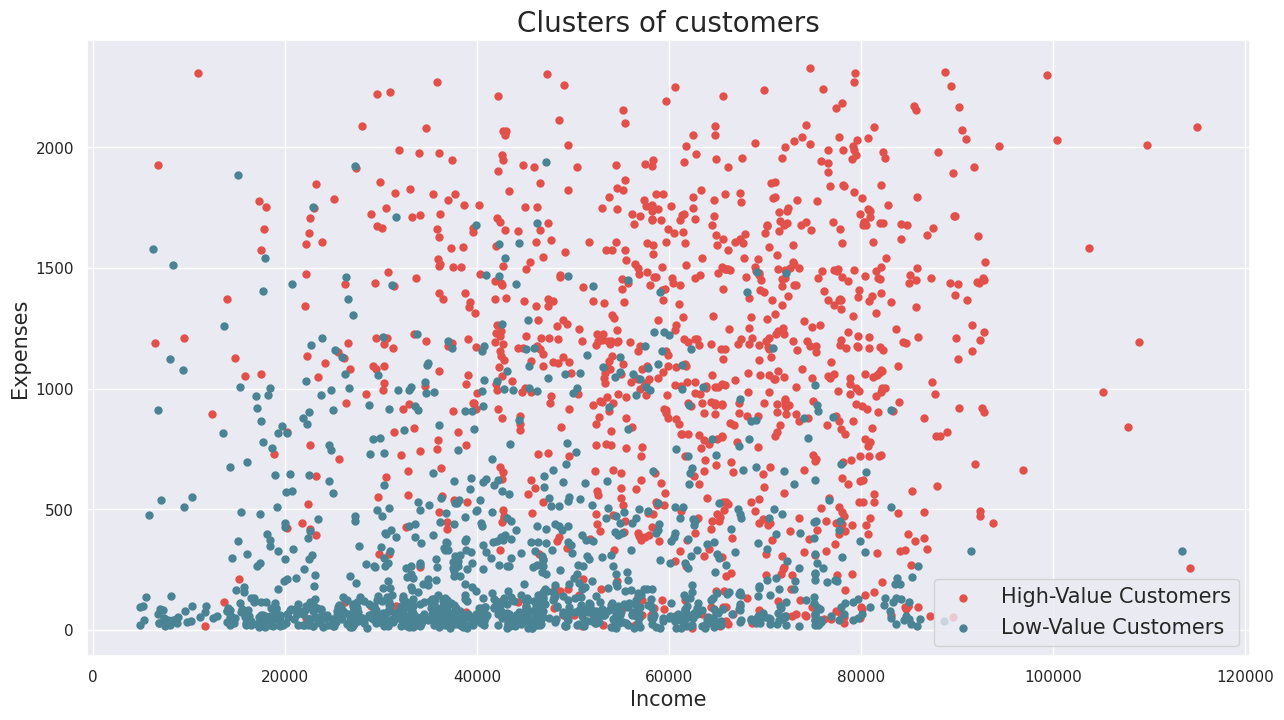

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], s = 25, c = '#E2504A', label = 'High-Value Customers')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], s = 25, c = '#498394', label = 'Low-Value Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

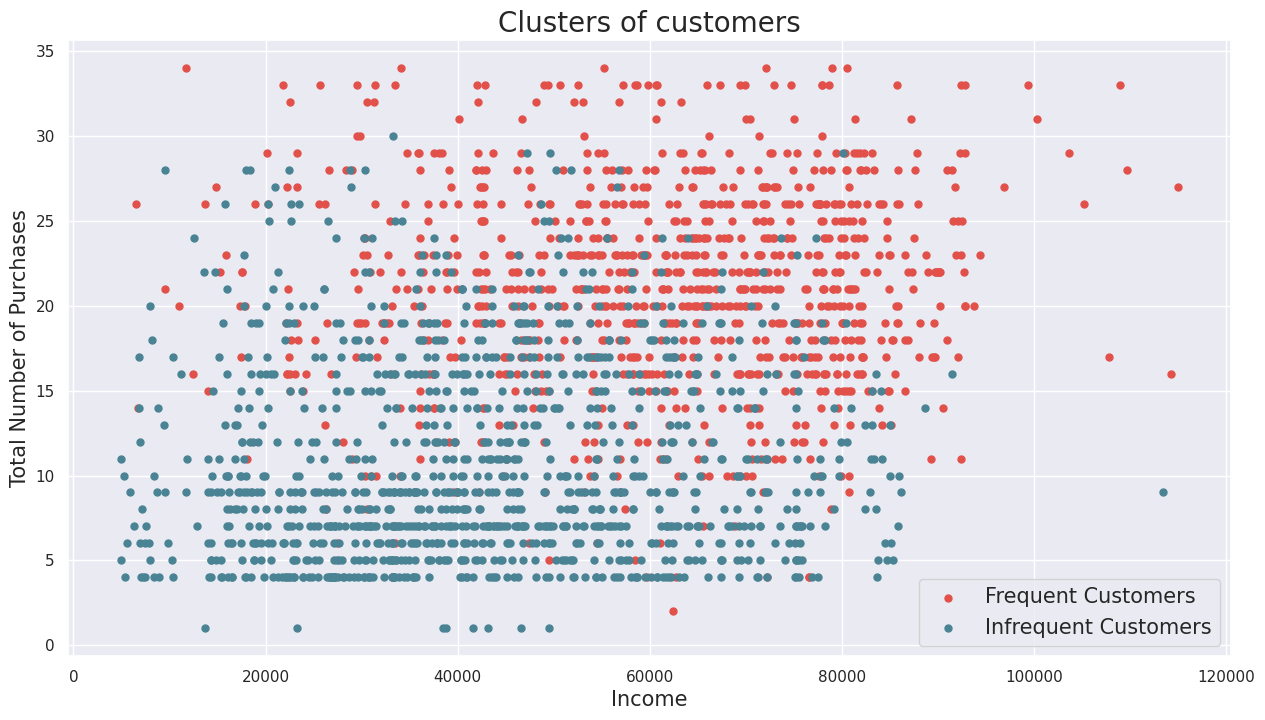

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 5], s = 25, c = '#E2504A', label = 'Frequent Customers')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 5], s = 25, c = '#498394', label = 'Infrequent Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Total Number of Purchases',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

The graphs of expenses versus income in the cluster are inverted compared to the original project, as is the graph of the total number of purchases versus income. This shows that higher-value customers have higher spending, while frequent customers have a greater total number of purchases.

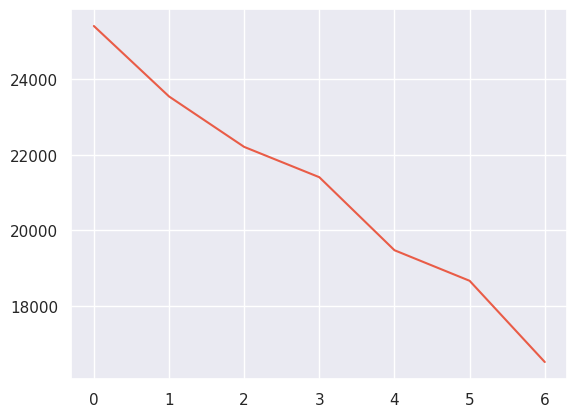

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [ ]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.11943184986316507
For n_clusters=3, the silhouette score is 0.12201479092570652
For n_clusters=4, the silhouette score is 0.1020964986335142
For n_clusters=5, the silhouette score is 0.1022439663570585
For n_clusters=6, the silhouette score is 0.12240150019162385
For n_clusters=7, the silhouette score is 0.11839512350562
For n_clusters=8, the silhouette score is 0.11888112279228742
For n_clusters=9, the silhouette score is 0.10173356197594148
For n_clusters=10, the silhouette score is 0.10354617882854249


The elbow plot suggests that 4 clusters would be ideal, while the silhouette analysis indicates that between 3 or 6 clusters would be optimal. In contrast, in the original project, both methods show that 3 clusters would be the most suitable.

In [ ]:
# Initialize the KMeans algorithm with chosen k
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=101)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

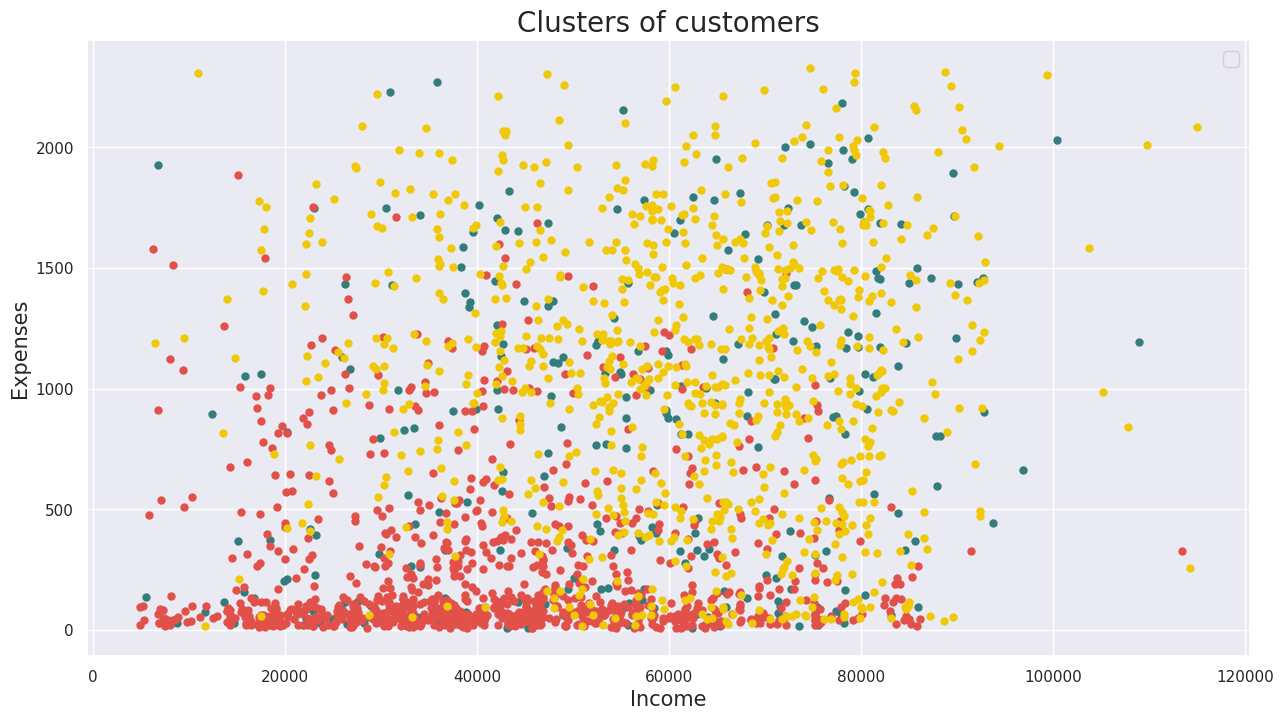

In [ ]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], c="#327D7C", s = 25)
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], c="#E2504A", s = 25)
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 4], c="#F0C808", s = 25)
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

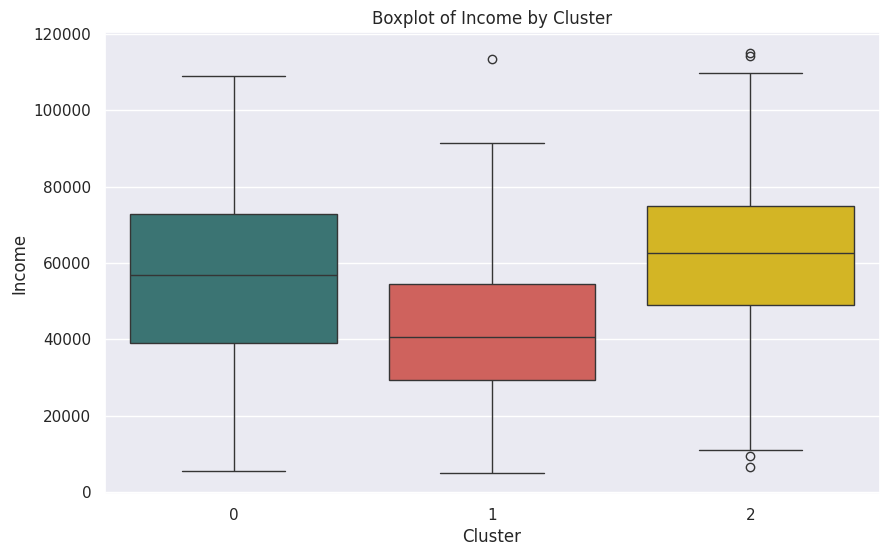

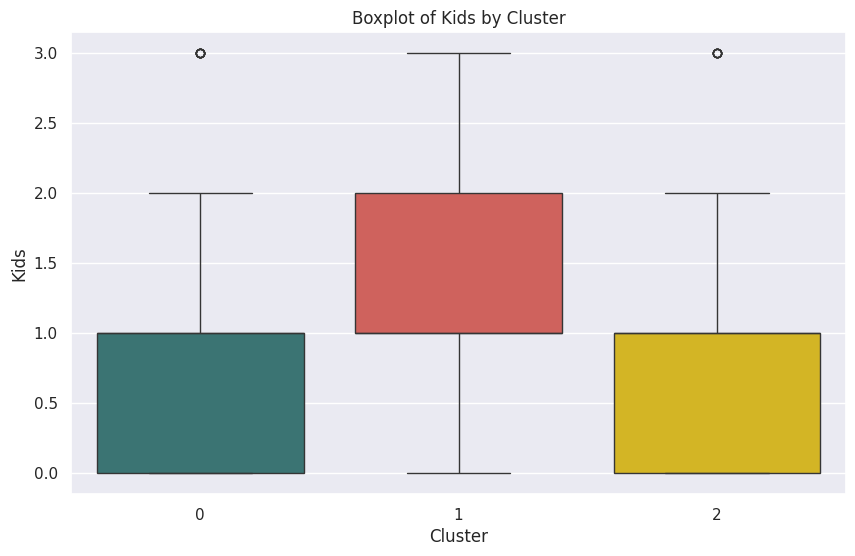

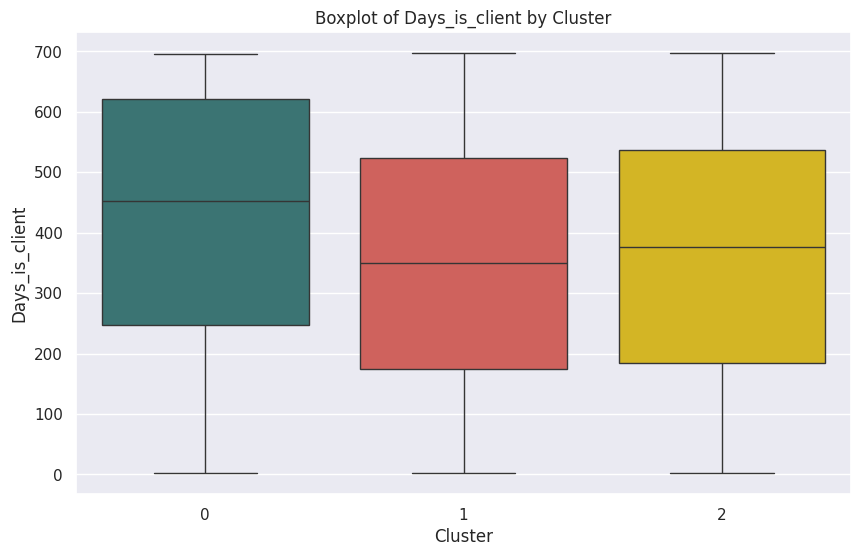

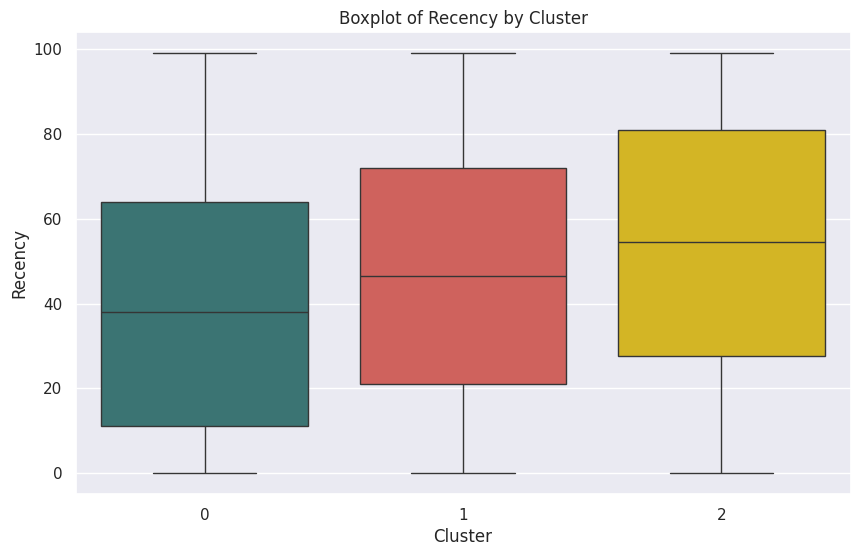

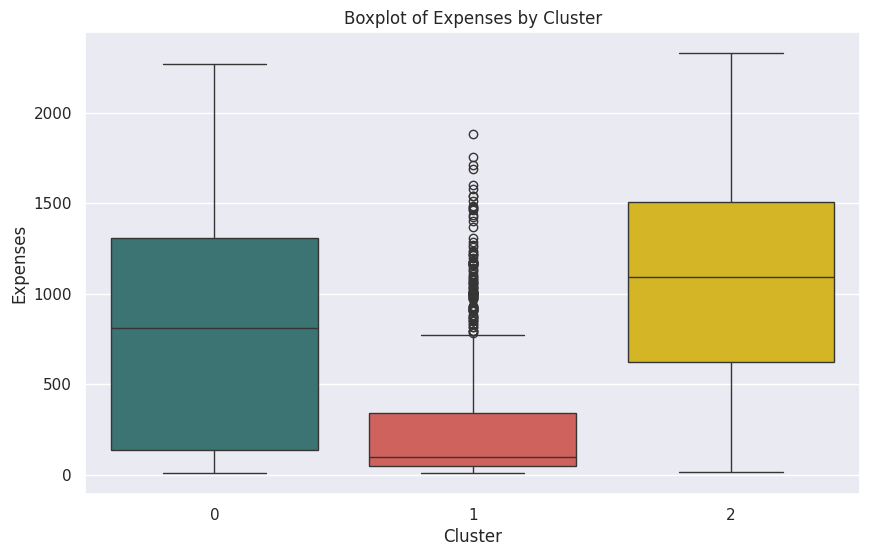

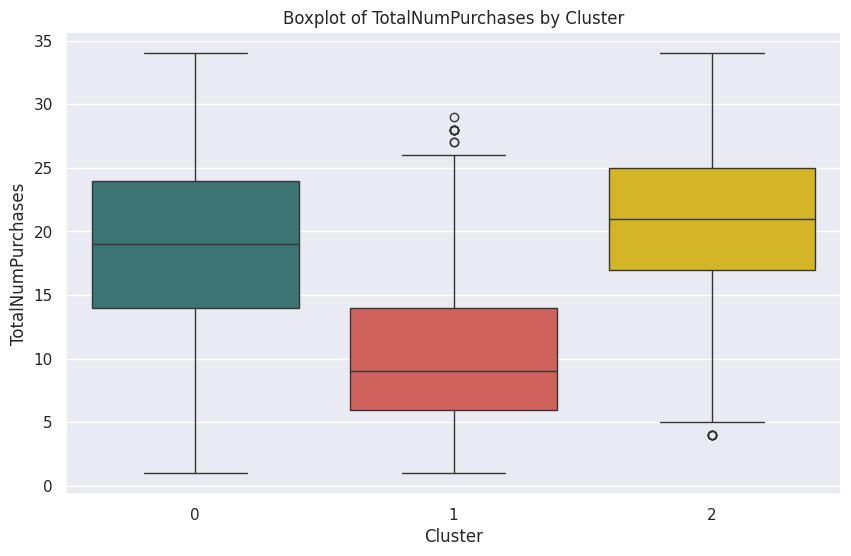

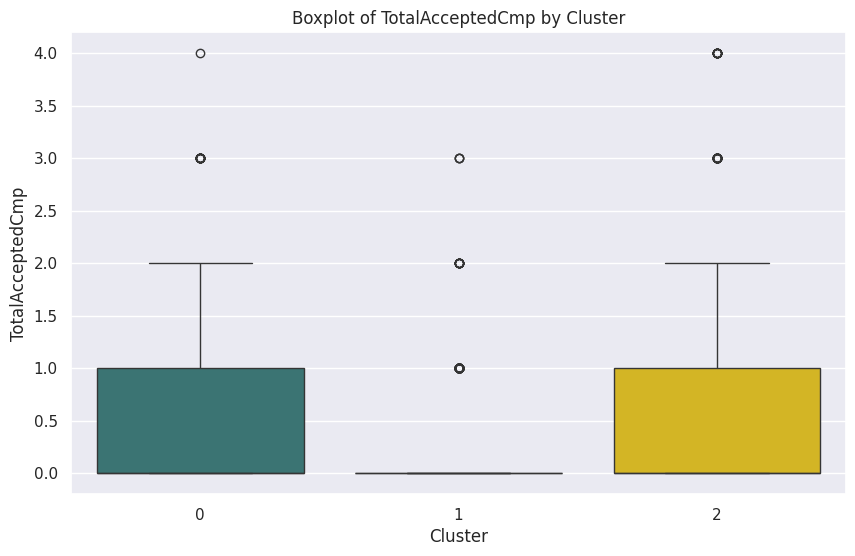

In [ ]:
custom_palette = ["#327D7C", "#E2504A", "#F0C808"]

# Create a copy of the original DataFrame and add a new column 'Cluster'
df_clusters = df_aug.copy()
df_clusters['Cluster'] = y_kmeans

# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters, palette=custom_palette)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

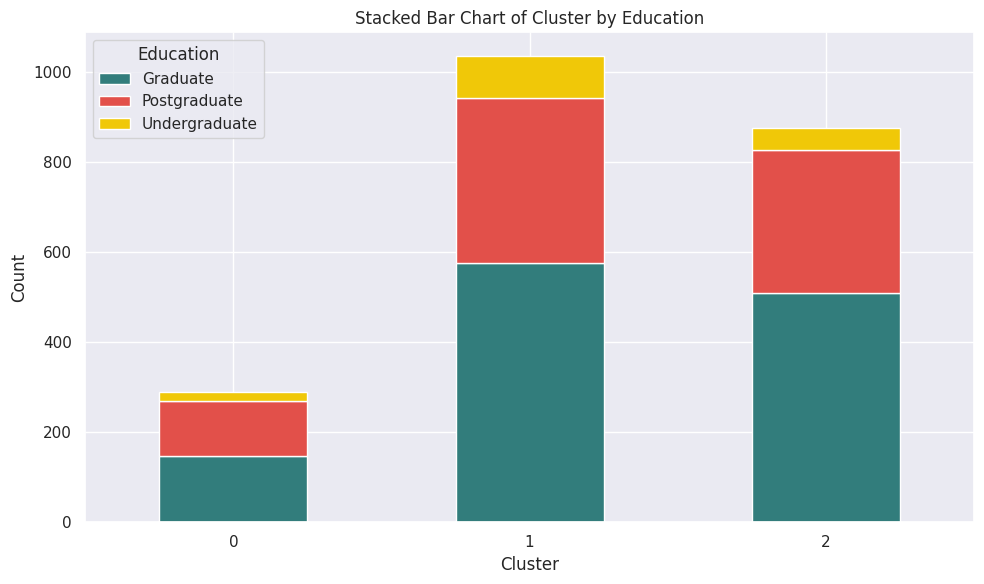

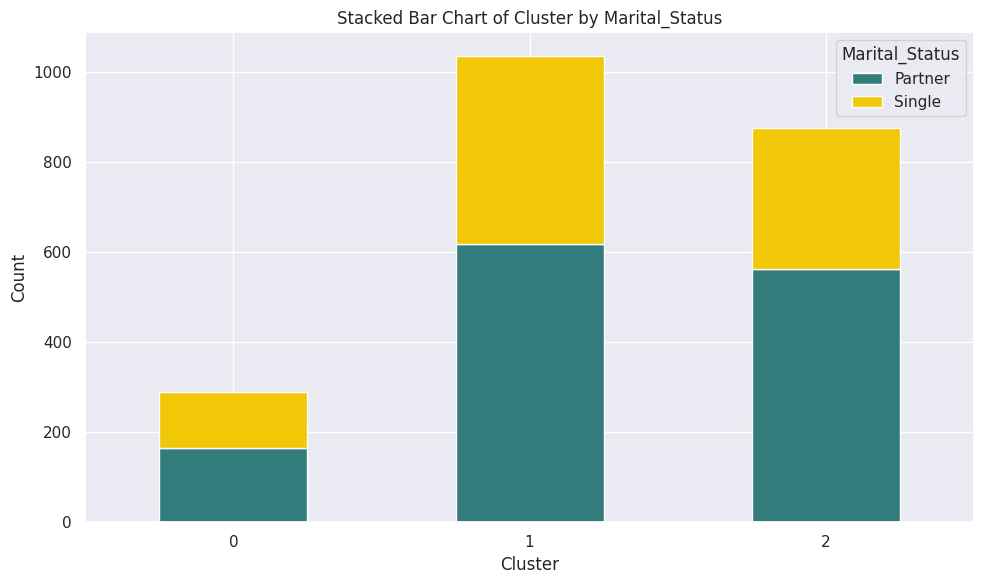

In [ ]:
# Define the custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()


Clusters
---
**0 (Niche)**

* Medium Income
* Without children or with at least 1 child
* Older customers

* Frequent customers

* Semi-high spending in the store

* Purchases semi-high number of products

* Does not participate or participates at least once in campaigns

* Most have standard or high-quality university education

* Most are in a relationship

* This is a group consisting of nearly 300 people.

---
1

* Low Income

* Between 1 to 2 children

* Not very old customers

* Infrequent purchases in the store

* Low spending in the store

* Purchases few products in the store

* Does not participate in campaigns

* Most have a standard university degree, a considerable portion have higher education, and this cluster has the highest number of individuals without formal education among all clusters.

* Almost half are single, and the other half are in a relationship.

* This is the largest cluster, with over 1,000 customers.
---
2

* High Income

* Have either no children or one child

* Somewhat long-standing customers

* Low purchase frequency

* High spending in the store

* Purchase many products in the store

* Participate in at least 1 campaign

* Most have a university education

* Most are in a relationship

* This cluster consists of nearly 900 customers




# Conclusions

There were certain similarities between the clusters created with the synthetic database and those from the original database. However, significant differences can be observed in the analyses conducted to evaluate the quality of the clusters. The original project shows better results, and the amount of data segmented into clusters varies disproportionately. This is evident when comparing Cluster 2 from the original project (the cluster with the lowest income and the smallest amount of segmented data) with Cluster 0 from the synthetic database (the cluster with the least segmented data but the best customer performance in the business). These differences highlight the impact of data quality and segmentation methods on cluster outcomes.